<a href="https://colab.research.google.com/github/huynhhoc/DataAnalystDeepLearning/blob/main/Labs/Lab06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mô hình hồi quy

**Mô hình hồi quy** là mô hình mô tả mối quan hệ giữa giá trị của một hay nhiều biến phụ thuộc (dependent/response variables) với tập hợp các biến độc lập (independent variables/predictors). Dạng đơn giản của một mô hình hồi quy là mô hình gốm có một biến phụ thuộc (biến đầu ra, biến Y) và một biến độc lặp (X).

**Thí dụ**: Để thể hiện mối quan hệ giữa huyết áp (Y) theo tuổi tác (X) hay sự phụ thuộc của trọng lượng (Y) của một đối tượng theo khẩu phần ăn hằng ngày (X), ta có thể biểu diễn mối quan hệ này qua mô hình hồi quy.

Nguồn: https://maths.uel.edu.vn/Resources/Docs/SubDomain/maths/TaiLieuHocTap/ToanUngDung/m_hnh_hi_quy_n_bin.html

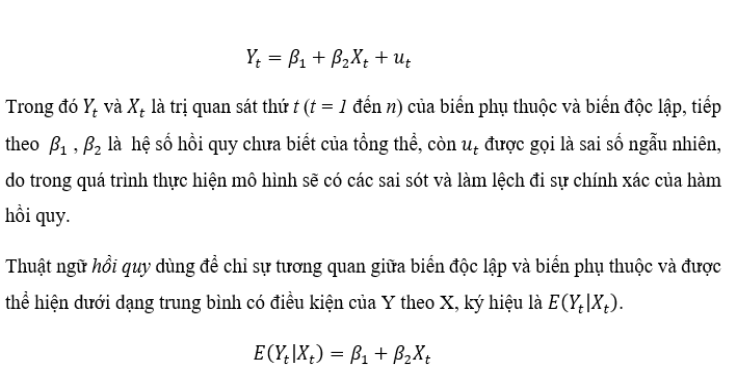

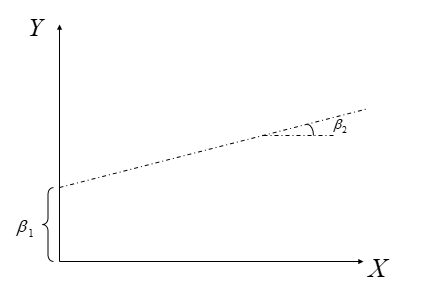

#Phương pháp bình phương bé nhất (Ordinary Least Squares - OLS)

Tham khảo: https://maths.uel.edu.vn/Resources/Docs/SubDomain/maths/TaiLieuHocTap/ToanUngDung/phng_php_bnh_phng_nh_nht_ols.html

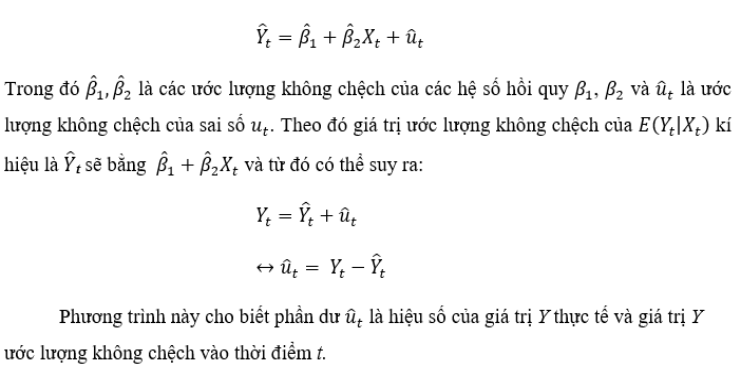

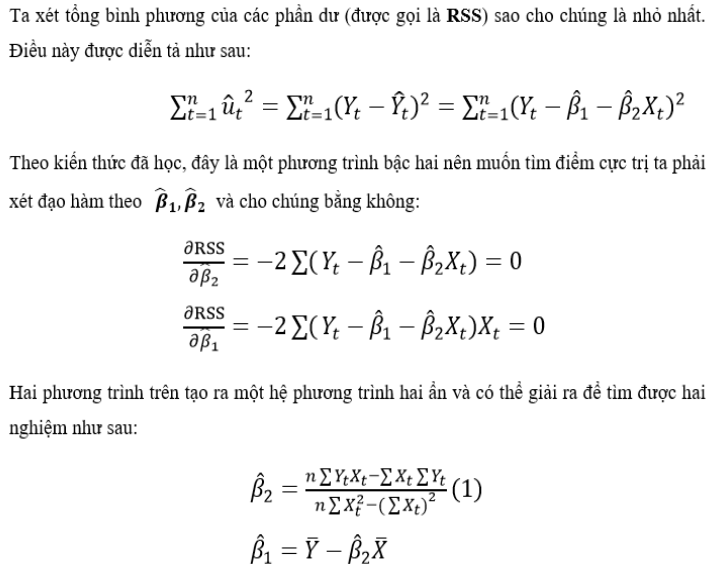

#Đánh giá chất lượng mô hình

Mô hình được đánh giá thông qua các giá trị thống kê: R-squared, Adj R-squared, F-statistic, t value.

* **R-squared** : the coefficient of determination. It is the proportion of the variance in the dependent variable that is predictable/explained
* **Adj. R-squared** : Adjusted R-squared is the modified form of R-squared adjusted for the number of independent variables in the model. Value of adj. R-squared increases, when we include extra variables which actually improve the model.
* **F-statistic** : the ratio of mean squared error of the model to the mean squared error of residuals. It determines the overall significance of the model.
* **t** : the value of t-statistic. It is the ratio of the difference between the estimated and hypothesised value of a parameter, to the standard error

#Tính R-squared

* Tổng bình phương độ lệch:

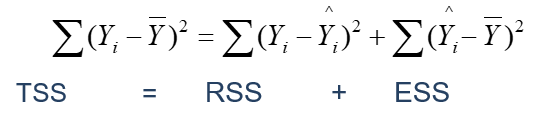

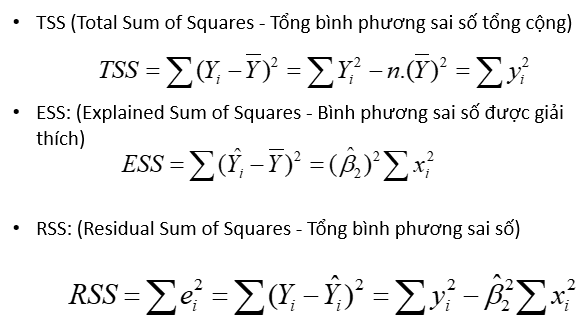

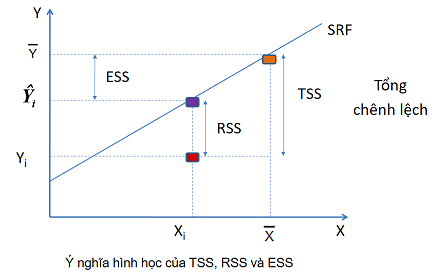

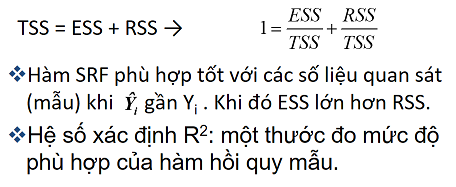

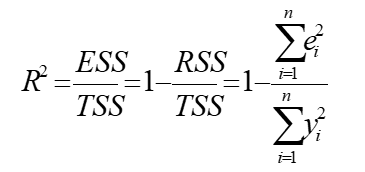

Ý nghĩa:
* 0≤ R2≤1 
* Cho biết % sự biến động của Y được giải thích bởi các biến số X trong mô hình.
* R2 =1: đường hồi quy phù hợp hoàn hảo
* R2 =0: X và Y không có quan hệ
* Nhược điểm: R2 tăng khi số biến X đưa vào mô hình tăng, dù biến đưa vào không có ý nghĩa.
=> Sử dụng R2 điều chỉnh (adjusted R2 ->R2) để quyết định đưa thêm biến vào mô hình.


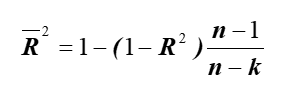

k: là số biến độc lập tham gia trong mô hình

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/huynhhoc/DataAnalystDeepLearning/main/Data/04_CIGARET.csv")

In [3]:
data.head(10)

,KgTar,KgNic,KgCO,MnTar,MnNic,MnCO,FLTar,FLNic,FLCO
0,20,1.1,16,16,1.1,15,5,0.4,4
1,27,1.7,16,13,0.8,17,16,1.0,19
2,27,1.7,16,16,1.0,19,17,1.2,17
3,20,1.1,16,9,0.9,9,13,0.8,18
4,20,1.1,16,14,0.8,17,13,0.8,18
5,24,1.4,17,13,0.8,17,14,1.0,13
6,20,1.1,16,12,0.8,15,15,1.1,17
7,23,1.4,15,14,0.8,17,15,1.1,15
8,20,1.0,16,14,0.9,15,15,1.1,15
9,22,1.2,14,13,0.8,17,9,0.8,12


In [4]:
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
result = smf.ols('KgNic~KgTar+KgCO',data).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  KgNic   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.211
Date:                Fri, 29 Oct 2021   Prob (F-statistic):              0.317
Time:                        05:41:52   Log-Likelihood:                 2.7726
No. Observations:                  25   AIC:                            0.4548
Df Residuals:                      22   BIC:                             4.111
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5937      0.793      2.010      0.0

In [6]:
data.corr()

,KgTar,KgNic,KgCO,MnTar,MnNic,MnCO,FLTar,FLNic,FLCO
KgTar,1.000000,0.245378,0.355832,0.360363,0.243808,0.346825,0.145279,0.085960,-0.007311
KgNic,0.245378,1.000000,-0.097074,0.178074,0.161782,0.165520,0.312625,0.301531,0.202048
KgCO,0.355832,-0.097074,1.000000,0.017182,0.055806,-0.045696,0.186520,0.002155,0.174522
MnTar,0.360363,0.178074,0.017182,1.000000,0.873034,0.865523,-0.327168,-0.318667,-0.425991
MnNic,0.243808,0.161782,0.055806,0.873034,1.000000,0.559662,-0.433179,-0.429229,-0.505144
MnCO,0.346825,0.165520,-0.045696,0.865523,0.559662,1.000000,-0.127329,-0.100211,-0.208299
FLTar,0.145279,0.312625,0.186520,-0.327168,-0.433179,-0.127329,1.000000,0.939107,0.849283
FLNic,0.085960,0.301531,0.002155,-0.318667,-0.429229,-0.100211,0.939107,1.000000,0.678522
FLCO,-0.007311,0.202048,0.174522,-0.425991,-0.505144,-0.208299,0.849283,0.678522,1.000000


Theo mô hình này, chúng ta tìm mối quan hệ giữa biến phụ thuộc KgNic và hai biến độc lập KgTar, KgCO.

Thông thường, có 3 vấn đề mà chúng ta cần quan tâm đầu tiên: đó là ***hệ số hồi quy*** có ý nghĩa thống kê không, ***mô hình*** có ý nghĩa không và ***mức độ giải thích*** của mô hình như thế nào.

# kiểm định giả thuyết hệ số hồi quy
Kiểm tra các hệ số hồi quy có ý nghĩa thống kê hay không?

Giả thuyết của chúng ta sẽ là beta = 0. Mục tiêu của chúng ta là bác bỏ giả thuyết này. Nghĩa là hệ số beta thực sự khác 0, và chúng ta có thể sử dụng hệ số beta ước lượng được để giải thích cho tác động của biến độc lập X lên sự biến động của biến phụ thuộc Y. Để thực hiện kiểm định này, chúng ta có thể sử dụng thống kê t hoặc thống kê z hoặc là giá trị P-value tương ứng.

Chúng ta thấy hệ số hồi quy của biến KgTar là 0.0231 với P-value tương ứng là 0.153 (>0.05). Điều này có nghĩa tác động của biến Kgtar lên KgNic không có ý nghĩa thống kê. Tương tự cho biến KgCO

#Vấn đề thứ hai là kiểm định mô hình hay còn gọi là kiểm định F.

Giả thuyết cho kiểm định này là tất cả các hệ số hồi quy đồng thời bằng 0. Ví dụ beta 1 = beta 2 =….= beta k = 0. Nếu giả thuyết này KHÔNG BỊ bác bỏ thì cũng đồng nghĩa với việc mô hình KHÔNG CÓ ý nghĩa thống kê. Vậy nên chúng ta cũng mong muốn bác bỏ giả thuyết này. Để thực hiện kiểm định này chúng ta dùng thống kê F hoặc giá trị P-value tương ứng.

Theo bảng kết quả trên, ta thấy giá trị F được tính là 1.211 với P-value tương ứng là 0.317 (>0.05). Do P-value > 0.05 nên mô hình này cũng không có ý nghĩa thống kê.

In [7]:
#Thí dụ 2:
resultMn = smf.ols('MnNic~MnTar+MnCO',data).fit()

print(resultMn.summary())

                            OLS Regression Results                            
Dep. Variable:                  MnNic   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     118.8
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           1.62e-12
Time:                        05:41:52   Log-Likelihood:                 31.318
No. Observations:                  25   AIC:                            -56.64
Df Residuals:                      22   BIC:                            -52.98
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2507      0.057      4.399      0.0